# Installing Dependencies and Setup

In [2]:
import tensorflow as tf
import os

In [ ]:
!pip list

In [3]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Removing dodgy images

In [5]:
import cv2
import imghdr
from matplotlib import pyplot as plt

C:\Users\hp\AppData\Local\Temp\ipykernel_12172\3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
data_dir = 'data'

In [7]:
os.listdir(os.path.join(data_dir, 'happy'))

['05-12-21-happy-people.jpg',
 '107307587-1695837909104-gettyimages-1446934118-istock_2022_10_17-ja1-107.jpeg',
 '220px-Shiny_Happy_People_Duggar_Family_Secrets_poster.jpg',
 '35438_hd.jpg',
 '360_F_230964014_ngHsPlPbY2MCa0enKBex6YLNdTB24pki.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '360_F_709672486_C7eaa5uLXe7qjYwuX0BvPeaUSemlVzpZ.jpg',
 '380649337.jpg',
 '4239f3d51d092f69d529f372a37b4601.jpg',
 '5400ea_cd54b25fdd2a4216819fe49413f0c976mv2.png',
 '56f455011e0000b300705475.jpeg',
 '6-things-happy-people-do.jpg',
 '8cEbMbgxi.jpg',
 'aecd7b04-bb40-42ad-9985-d63a3198a878.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'bigstock-Senior-citizens-on-holiday-22143350.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'community-young-people-happy-together_23-2148431416.jpg',
 'Copy-of-Rustic-Female-Teen-Magazine-Cover.jpg',
 'file-20230208-27-3jttof.jpg',
 'GettyImages-871518740.jpg',
 'getty_152414899_9704609

In [8]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [9]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

05-12-21-happy-people.jpg
107307587-1695837909104-gettyimages-1446934118-istock_2022_10_17-ja1-107.jpeg
220px-Shiny_Happy_People_Duggar_Family_Secrets_poster.jpg
35438_hd.jpg
360_F_230964014_ngHsPlPbY2MCa0enKBex6YLNdTB24pki.jpg
360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg
360_F_709672486_C7eaa5uLXe7qjYwuX0BvPeaUSemlVzpZ.jpg
380649337.jpg
4239f3d51d092f69d529f372a37b4601.jpg
5400ea_cd54b25fdd2a4216819fe49413f0c976mv2.png
56f455011e0000b300705475.jpeg
6-things-happy-people-do.jpg
8cEbMbgxi.jpg
aecd7b04-bb40-42ad-9985-d63a3198a878.jpg
bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg
bigstock-Senior-citizens-on-holiday-22143350.jpg
business-people-succesful-celebrating-group-successful-39416686-800x500.jpg
community-young-people-happy-together_23-2148431416.jpg
Copy-of-Rustic-Female-Teen-Magazine-Cover.jpg
file-20230208-27-3jttof.jpg
GettyImages-871518740.jpg
getty_152414899_97046097045006_68075.jpg
getty_478389113_970647970450091_99776.jpg
getty_505175324_2000131020

In [11]:
img = cv2.imread(os.path.join('data', 'happy', 'Happy-Guy.jpg'))
img.shape

(427, 640, 3)

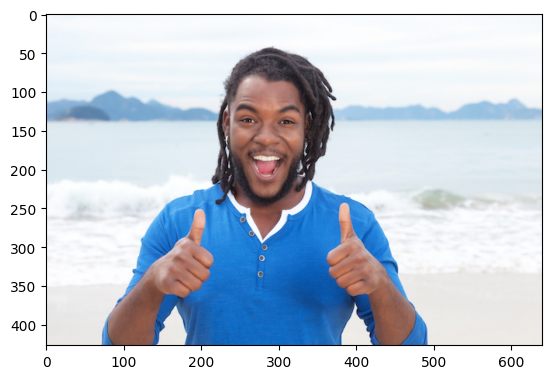

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

# Loading the Data

In [14]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [15]:
import numpy as np

In [16]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 175 files belonging to 2 classes.


In [17]:
data_iterator = data.as_numpy_iterator()

In [18]:
batch = data_iterator.next()

In [19]:
batch[0].shape

(32, 256, 256, 3)

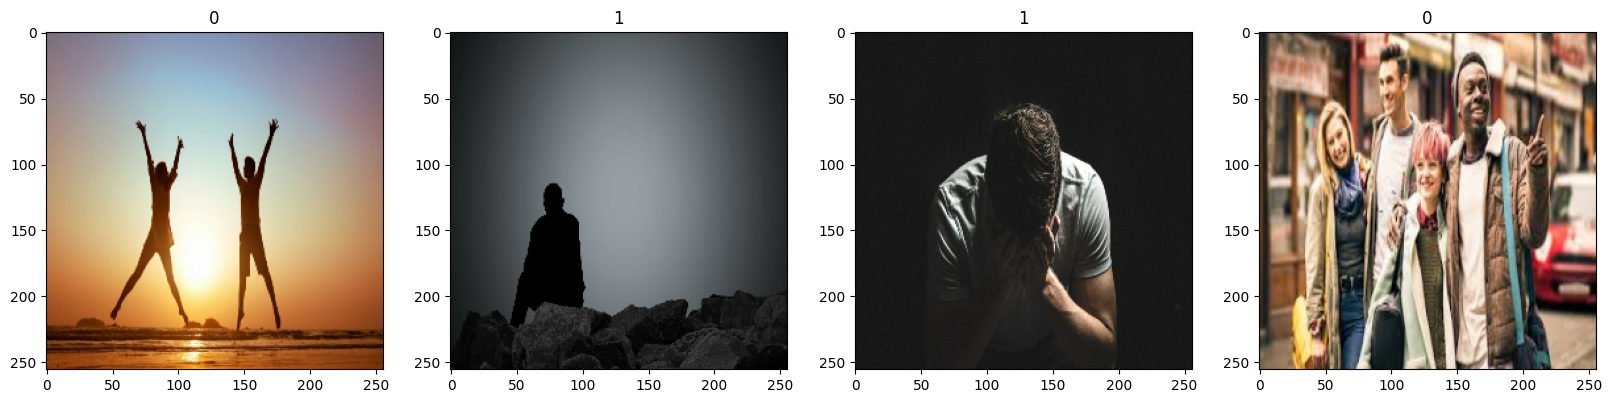

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scaling the Data

In [21]:
data = data.map(lambda x,y: (x/255, y))

In [22]:
data.as_numpy_iterator().next()[0].min()

0.0

# Splitting The Data

In [23]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [24]:
len(data)

6

In [25]:
test_size

1

# Building CNN Model

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [29]:
model = Sequential()

In [32]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# Training

In [34]:
logdir='logs'

In [35]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [38]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 612ms/step - accuracy: 0.4875 - loss: 1.0432 - val_accuracy: 0.3125 - val_loss: 0.8884
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 348ms/step - accuracy: 0.4990 - loss: 0.7500 - val_accuracy: 0.6250 - val_loss: 0.5667
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 368ms/step - accuracy: 0.6833 - loss: 0.5842 - val_accuracy: 0.7500 - val_loss: 0.5210
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 351ms/step - accuracy: 0.7979 - loss: 0.5021 - val_accuracy: 0.8750 - val_loss: 0.4541
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step - accuracy: 0.8438 - loss: 0.4235 - val_accuracy: 0.8125 - val_loss: 0.3644
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 319ms/step - accuracy: 0.8438 - loss: 0.3372 - val_accuracy: 0.9062 - val_loss: 0.2747
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 349ms/step - accuracy: 0.8771 - loss: 0.2863 - val_accuracy: 0.9688 - val_loss: 0.2101
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 361ms/step - accuracy: 0.9208 - loss: 0.2270 - val_accuracy: 0.9688 - val_loss:

In [39]:
hist.history

{'accuracy': [0.5078125,
  0.5703125,
  0.71875,
  0.75,
  0.828125,
  0.8203125,
  0.84375,
  0.9296875,
  0.9375,
  0.9609375,
  0.9609375,
  0.984375,
  1.0,
  0.9921875,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [1.0927082300186157,
  0.6877825260162354,
  0.5815649032592773,
  0.5140471458435059,
  0.43355023860931396,
  0.35087355971336365,
  0.31404611468315125,
  0.22555218636989594,
  0.15690362453460693,
  0.10451972484588623,
  0.0943056270480156,
  0.05021965503692627,
  0.01913541555404663,
  0.021312568336725235,
  0.010193077847361565,
  0.006238044239580631,
  0.0038429992273449898,
  0.0025709341280162334,
  0.0016388206277042627,
  0.0007216351805254817],
 'val_accuracy': [0.3125,
  0.625,
  0.75,
  0.875,
  0.8125,
  0.90625,
  0.96875,
  0.96875,
  0.96875,
  0.9375,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.8883508443832397,
  0.5667034387588501,
  0.5210245847702026,
  0.4541056752204895,
  0.3644393980503082,

# Visualising The Performance

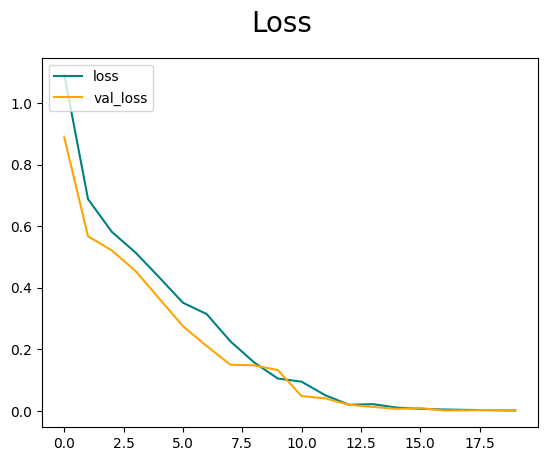

In [42]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

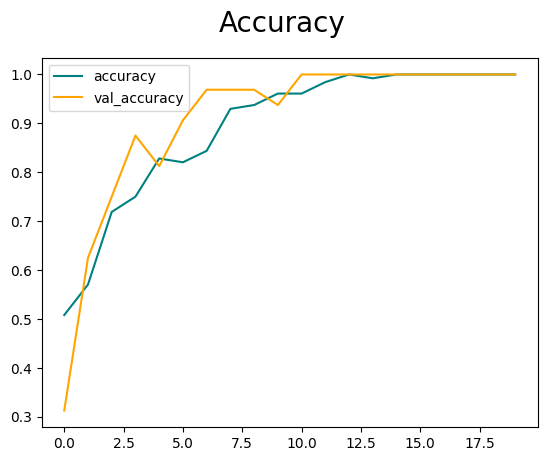

In [43]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluating The model

In [45]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [46]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [47]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


In [49]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# Testing The Model

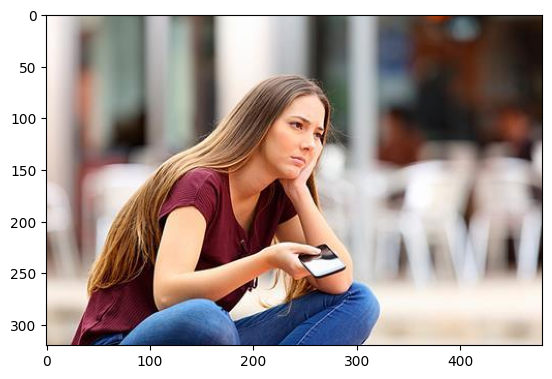

In [62]:
img = cv2.imread('sad_test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

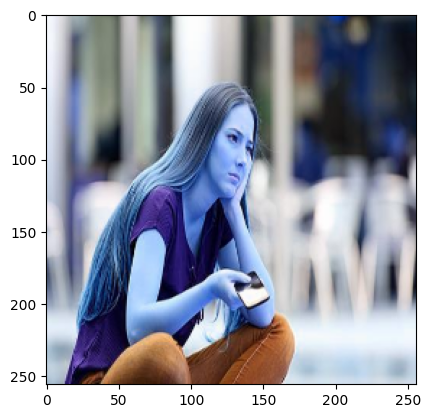

In [63]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [64]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [65]:
yhat

array([[0.95036495]], dtype=float32)

In [66]:
if yhat  > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# Saving the Model

In [67]:
from tensorflow.keras.models import load_model

In [70]:
model.save(os.path.join('models', 'happysadmodel.h5'))

In [74]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [75]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


array([[0.95036495]], dtype=float32)